## Pizza - Multi Class Classify

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import random
from shutil import copyfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2021-10-26 04:52:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   179MB/s    in 2.8s    

2021-10-26 04:52:04 (179 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# content -> 10_food_classes_all_data -> train -> chicken_curry, chicken_wings, etc
# content -> 10_food_classes_all_data -> test -> chicken_curry, chicken_wings, etc

import os
import zipfile

local_zip = '/content/10_food_classes_all_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/10_food_classes_all_data'

train_dir = os.path.join(base_dir, '/train')
valid_dir = os.path.join(base_dir, '/test')

In [ ]:
for dirpath, dirnames, filenames in os.walk(base_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/

In [ ]:
import pathlib

data_dir = pathlib.Path('/content/10_food_classes_all_data/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
TRAIN_DIR = "/content/10_food_classes_all_data/train/"
VALID_DIR = "/content/10_food_classes_all_data/test/"

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (512, 512, 3)


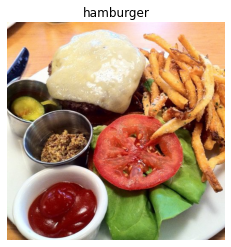

In [ ]:
import random

img = view_random_image(target_dir=TRAIN_DIR,
                        target_class=random.choice(class_names))

Image shape: (512, 512, 3)


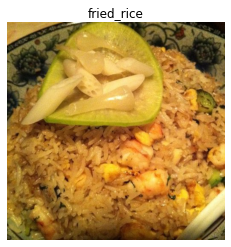

In [ ]:
import random

img = view_random_image(target_dir=VALID_DIR,
                        target_class=random.choice(class_names))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)        

train_generator = train_datagen.flow_from_directory(
                                  TRAIN_DIR,   
                                  target_size=(224, 224),       # same as model input image size
                                  batch_size=41,             
                                  seed=20,                      
                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255.)

valid_generator = valid_datagen.flow_from_directory(
                                  VALID_DIR, 
                                  target_size=(224, 224),  
                                  batch_size=41,
                                  seed=20,
                                  class_mode='categorical')

Found 2500 images belonging to 10 classes.


In [ ]:
len(class_names)

10

In [ ]:
img_height = 224        
img_width = 224
num_classes = len(class_names)

In [ ]:
model = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=0.001)     # 1e-3
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [ ]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=12)
reduce_lr         = ReduceLROnPlateau(monitor='val_loss', patience=5, min_lr=0.0001, factor=0.05, mode='min', verbose=1)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [ ]:
epochs = 30
callbacks = [early_stopping, reduce_lr, model_checkpoint]

In [ ]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/30
183/183 [==============================] - 54s 292ms/step - loss: 2.1947 - accuracy: 0.1801 - val_loss: 2.0166 - val_accuracy: 0.2804
Epoch 2/30
183/183 [==============================] - 53s 290ms/step - loss: 2.0021 - accuracy: 0.2911 - val_loss: 1.8787 - val_accuracy: 0.3568
Epoch 3/30
183/183 [==============================] - 53s 290ms/step - loss: 1.8774 - accuracy: 0.3440 - val_loss: 1.7524 - val_accuracy: 0.3944
Epoch 4/30
183/183 [==============================] - 53s 289ms/step - loss: 1.7825 - accuracy: 0.3897 - val_loss: 1.7148 - val_accuracy: 0.4116
Epoch 5/30
183/183 [==============================] - 53s 290ms/step - loss: 1.6813 - accuracy: 0.4236 - val_loss: 1.6555 - val_accuracy: 0.4316
Epoch 6/30
183/183 [==============================] - 53s 290ms/step - loss: 1.5634 - accuracy: 0.4636 - val_loss: 1.6429 - val_accuracy: 0.4456
Epoch 7/30
183/183 [==============================] - 54s 293ms/step - loss: 1.4559 - accuracy: 0.5063 - val_loss: 1.5925 - val_ac

In [ ]:
history.history

{'accuracy': [0.18013332784175873,
  0.2910666763782501,
  0.3440000116825104,
  0.38973334431648254,
  0.4235999882221222,
  0.4636000096797943,
  0.5062666535377502,
  0.5568000078201294,
  0.5889333486557007,
  0.6297333240509033,
  0.651199996471405,
  0.6984000205993652,
  0.7281333208084106,
  0.7513333559036255,
  0.7761333584785461,
  0.7993333339691162,
  0.854533314704895,
  0.866266667842865,
  0.871066689491272,
  0.8738666772842407,
  0.8833333253860474,
  0.887066662311554,
  0.8899999856948853],
 'loss': [2.1947293281555176,
  2.00213885307312,
  1.877360463142395,
  1.7824547290802002,
  1.6812669038772583,
  1.5633835792541504,
  1.45592200756073,
  1.3282591104507446,
  1.2246756553649902,
  1.1021326780319214,
  1.0157321691513062,
  0.8947403430938721,
  0.7855621576309204,
  0.7212790250778198,
  0.6632595062255859,
  0.5957661271095276,
  0.43919622898101807,
  0.40538057684898376,
  0.3829038143157959,
  0.3701614439487457,
  0.35402995347976685,
  0.337470144033

<Figure size 432x288 with 0 Axes>

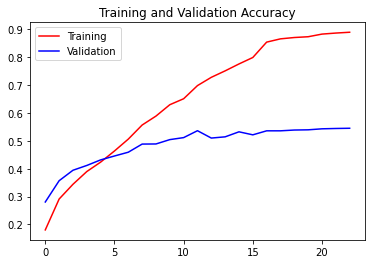

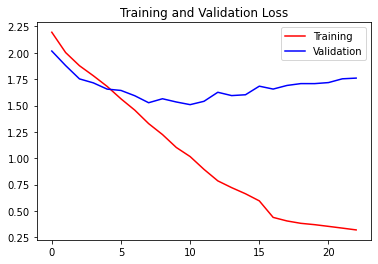

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

## Checking out LR range

In [ ]:
model = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
optimizer   = tf.keras.optimizers.Adam(learning_rate=1e-5)
loss        = tf.keras.losses.CategoricalCrossentropy()
metrics     = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [ ]:
early_stopping    = EarlyStopping(monitor='val_loss', patience=15)
model_checkpoint  = ModelCheckpoint(monitor='val_loss', filepath='./best_model.h5', save_best_only=True)

In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 8))

In [ ]:
epochs = 40
callbacks = [early_stopping, model_checkpoint, lr_schedule]

In [ ]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    verbose = 1,
                    epochs = epochs,
                    callbacks = callbacks)

Epoch 1/40
183/183 [==============================] - 56s 299ms/step - loss: 2.3045 - accuracy: 0.1020 - val_loss: 2.2907 - val_accuracy: 0.1512
Epoch 2/40
183/183 [==============================] - 54s 297ms/step - loss: 2.2847 - accuracy: 0.1433 - val_loss: 2.2548 - val_accuracy: 0.2384
Epoch 3/40
183/183 [==============================] - 55s 299ms/step - loss: 2.2178 - accuracy: 0.1921 - val_loss: 2.1447 - val_accuracy: 0.2052
Epoch 4/40
183/183 [==============================] - 55s 298ms/step - loss: 2.1352 - accuracy: 0.2141 - val_loss: 2.0648 - val_accuracy: 0.2688
Epoch 5/40
183/183 [==============================] - 55s 300ms/step - loss: 2.0617 - accuracy: 0.2535 - val_loss: 1.9903 - val_accuracy: 0.2964
Epoch 6/40
183/183 [==============================] - 55s 302ms/step - loss: 2.0034 - accuracy: 0.2853 - val_loss: 1.9279 - val_accuracy: 0.3184
Epoch 7/40
183/183 [==============================] - 55s 300ms/step - loss: 1.9451 - accuracy: 0.3219 - val_loss: 1.8902 - val_ac

(1e-06, 0.1, 1.3, 2.3)

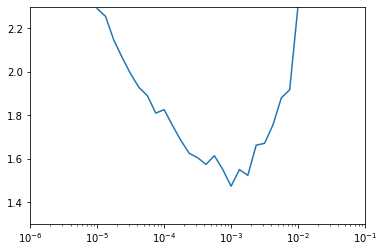

In [ ]:
plt.semilogx(history.history['lr'], history.history['val_loss'])
plt.axis([1e-6, 1e-1, 1.3, 2.3])

In [ ]:
history.history['lr']

[1e-05,
 1.3335214e-05,
 1.7782793e-05,
 2.3713737e-05,
 3.1622778e-05,
 4.216965e-05,
 5.6234134e-05,
 7.4989424e-05,
 1e-04,
 0.00013335215,
 0.00017782794,
 0.00023713737,
 0.00031622776,
 0.00042169652,
 0.0005623413,
 0.0007498942,
 0.001,
 0.0013335214,
 0.0017782794,
 0.0023713738,
 0.0031622776,
 0.004216965,
 0.0056234132,
 0.0074989423,
 0.01,
 0.013335214,
 0.017782794,
 0.023713738,
 0.031622775,
 0.04216965,
 0.056234132,
 0.07498942]

In [ ]:
history.history['val_loss']

[2.290703535079956,
 2.2548208236694336,
 2.144747734069824,
 2.064812183380127,
 1.9902986288070679,
 1.9278523921966553,
 1.8901866674423218,
 1.8099031448364258,
 1.8260273933410645,
 1.7532464265823364,
 1.6842583417892456,
 1.6250485181808472,
 1.6050084829330444,
 1.5738393068313599,
 1.6141635179519653,
 1.551218032836914,
 1.4737950563430786,
 1.550358772277832,
 1.5236754417419434,
 1.662551999092102,
 1.6709413528442383,
 1.755212664604187,
 1.8798296451568604,
 1.9171087741851807,
 2.3035988807678223,
 2.3033604621887207,
 2.304137706756592,
 2.3054678440093994,
 2.306314468383789,
 2.306062698364258,
 2.307955503463745,
 2.3130154609680176]